In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
import time

In [2]:
adata = sc.read_h5ad('endocrinogenesis.h5ad')
X_pca  = adata.obsm['X_pca']

In [3]:
data_clusters = adata.obs['clusters']
data_clusters_set = set(data_clusters.values)
zip_types = zip(sorted(data_clusters_set),range(len(data_clusters_set)))
dict_types = dict(zip_types)
cell_clusters  =  [dict_types[i] for i in data_clusters.values]

In [4]:
from dtne import *

The code runs 28s.


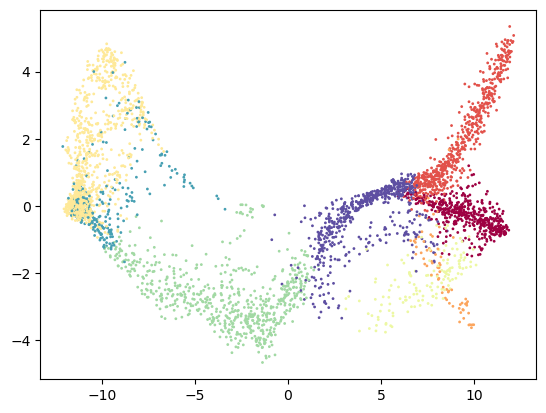

In [5]:
start_time = time.time()
embedding = DTNE() 
Y = embedding.fit_transform(X_pca)
end_time = time.time()
print('The code runs {:.0f}s.'.format(end_time - start_time))
plt.scatter(Y[:,0], Y[:,1], c=cell_clusters,s=1,cmap='Spectral')

The code runs 19s.


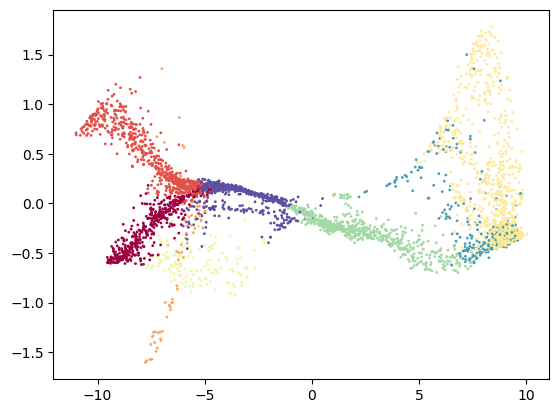

In [6]:
start_time = time.time()
embedding = DTNE(k_neighbors = 15,l1=10) # k_neighbors = 50,l1=5
Y = embedding.fit_transform(X_pca)
end_time = time.time()
print('The code runs {:.0f}s.'.format(end_time - start_time))
plt.scatter(Y[:,0], Y[:,1], c=cell_clusters,s=1,cmap='Spectral')

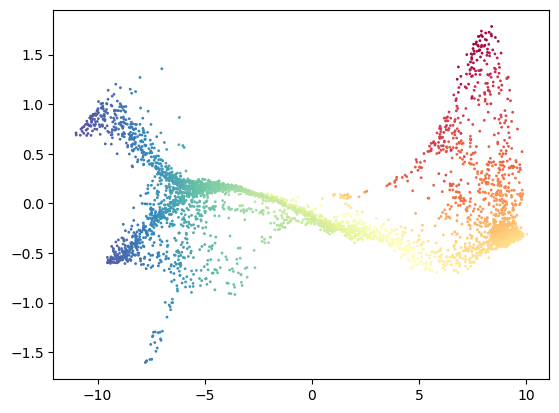

In [7]:
diff_time = embedding.order_cells(root_cells=[2208])
plt.scatter(Y[:,0], Y[:,1],c=diff_time,s=1,cmap='Spectral')

In [8]:
pd.DataFrame(Y).to_csv('panc.Y_dtne.csv')
pd.DataFrame(diff_time).to_csv('pan.dtne_pseudotime.csv')

Calculating PHATE...
  Running PHATE on 3696 observations and 50 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.18 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 0.21 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 0.23 seconds.
    Calculating KMeans...
    Calculated KMeans in 1.22 seconds.
  Calculated landmark operator in 1.80 seconds.
  Calculating optimal t...
    Automatically selected t = 17
  Calculated optimal t in 2.06 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.31 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 1.74 seconds.
Calculated PHATE in 6.13 seconds.


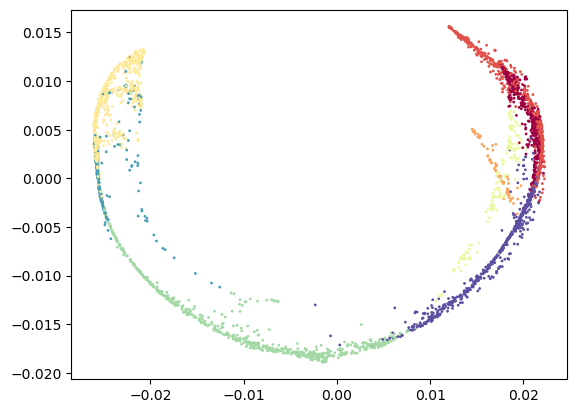

In [9]:
import phate

phate_operator = phate.PHATE(n_jobs=-2)
Y_phate = phate_operator.fit_transform(X_pca)
plt.scatter(Y_phate[:,0], Y_phate[:,1], c=cell_clusters,s=1,cmap='Spectral')

In [10]:
pd.DataFrame(Y_phate).to_csv('panc.Y_phate.csv')

The code runs 10s.


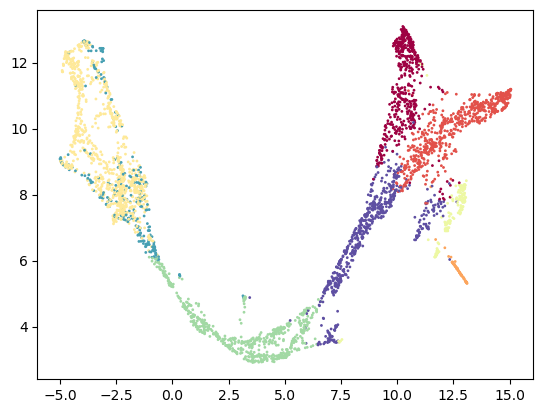

In [11]:
from umap import UMAP

start_time = time.time()
umap_operator = UMAP() 
Y_umap = umap_operator.fit_transform(X_pca)
end_time = time.time()
print('The code runs {:.0f}s.'.format(end_time - start_time))

plt.scatter(Y_umap[:,0],Y_umap[:,1], c=cell_clusters,s =1,cmap="Spectral")

In [12]:
pd.DataFrame(Y_umap).to_csv('panc.Y_umap.csv')

The code runs 12s.


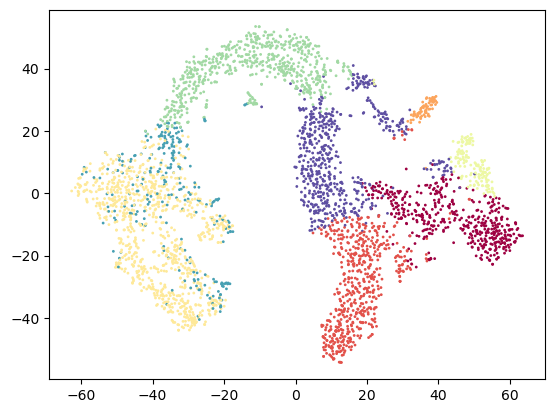

In [13]:
from sklearn import manifold

start_time = time.time()
tsne_operator = manifold.TSNE()
Y_tsne = tsne_operator.fit_transform(X_pca)
end_time = time.time()
print('The code runs {:.0f}s.'.format(end_time - start_time))

plt.scatter(Y_tsne[:,0],Y_tsne[:,1], c=cell_clusters,s =1,cmap="Spectral")

In [14]:
pd.DataFrame(Y_tsne).to_csv('panc.Y_tsne.csv')

In [15]:
pd.DataFrame(X_pca).to_csv('panc.Y_pca.csv')

In [16]:
pd.DataFrame(data_clusters).to_csv('panc.clusters.csv')